<a href="https://colab.research.google.com/github/HamzaGbada/ML-Examples/blob/main/Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testing Linear Regression on data with and without fracture

In this cell we are creating a data frature example using random modue

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
 
# defining the mean
mu = 0.5
# defining the standard deviation
sigma = 0.1
 
# The random module uses the seed value as a base
# to generate a random number. If seed value is not
# present, it takes the system’s current time.
np.random.seed(0)
 
# define the train data
X_train = np.random.normal(mu, sigma, (200, 1))
y_train = np.random.normal(mu , sigma * 2, (200, 1))
 
# define the test data
X_test = np.random.normal(mu * 2, sigma * 3, (100, 1))
y_test = np.random.normal(mu , sigma * 2, (100, 1))

[Text(0.5, 1.0, 'Histograms of the train and test data')]

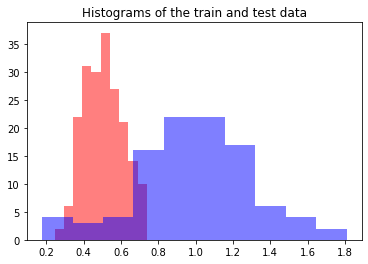

In [ ]:
plt.hist(X_train, alpha=0.5, color= 'r')
plt.hist(X_test, alpha=0.5, color= 'b')
plt.gca().set(title='Histograms of the train and test data (a dataset fracture)')

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Testing using the Mean Squared Error (MSE)

In [ ]:
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.048528963795782545


## Example without data fracture

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
 
# defining the mean
mu = 0.4
# defining the standard deviation
sigma = 0.2
 
# The random module uses the seed value as a base
# to generate a random number. If seed value is not
# present, it takes the system’s current time.
np.random.seed(0)
 
# define the train data
X_train = np.random.normal(mu, sigma, (200, 1))
y_train = np.random.normal(mu , sigma * 2, (200, 1))
 
# define the test data
X_test = np.random.normal(mu, sigma, (100, 1))
y_test = np.random.normal(mu , sigma * 2, (100, 1))

[Text(0.5, 1.0, 'Histograms of the train and test data (a dataset without fracture)')]

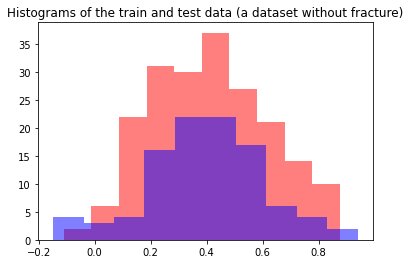

In [ ]:
plt.hist(X_train, alpha=0.5, color= 'r')
plt.hist(X_test, alpha=0.5, color= 'b')
plt.gca().set(title='Histograms of the train and test data (a dataset without fracture)')

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.16485978935841214




# An implementation of PCA (Principal Component Analysis ) using Numpy

In [ ]:
import numpy as np
from numpy import linalg as LA
from sklearn import datasets

def PCA(X, k):
  
  mean_vector = np.mean(X, axis=0) 
  # Data centring
  X_centred = X - mean_vector

  # Compute covariance
  X_cov = np.cov(X_centred, rowvar = False)

  # Compute eigenvalues and eigenvector
  eigenvalues, eigenvector = LA.eigh(X_cov)

  # Sort eigenvector by their eigenvalue (from largest to the smallest)
  # np.argsort return an array contains indice of element in the original array, after sorting it
  sorted_index = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalue = eigenvalues[sorted_index]
  sorted_eigenvectors = eigenvector[:,sorted_index]

  # Select top k eigenvector as principale component to represent the data in a low dimensinal space (Dimensinality Reduction)
  eigenvector_subset = sorted_eigenvectors[:,0:k]

  # Transform the data using top k eigenvector into te space
  T = np.dot(X_centred, eigenvector_subset)
  return T

# load dataset
df1 = pd.read_csv("train1.csv") 
df1_numpy = df1.values
X = df1_numpy[:,0:2]
y = df1_numpy[:,2]

k_best = 2
T = PCA(X,k_best)
y.shape

(200,)

We test our PCA on 5-fold Cross Validation and we print three type of metrics (Accuracy, Sensetivity and Specificity)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import metrics

k = 5
kf = KFold(n_splits=k)
model = SVC(kernel="linear")
acc_score = []
sens_score = []
spec_score = []
for train_index , test_index in kf.split(X):
    
    X_train_kf , X_test_kf = X[train_index,:], X[test_index,:]
    y_train_kf , y_test_kf = y[train_index] , y[test_index]
    pca_train = PCA(X_train_kf, 2)
    pca_test = PCA(X_test_kf, 2)

    model.fit(pca_train,y_train_kf)
    pred_values = model.predict(pca_test)

    acc = metrics.accuracy_score(pred_values , y_test_kf)
    sensetivity = metrics.recall_score(pred_values , y_test_kf)
    specificity = metrics.precision_score(pred_values , y_test_kf)
    acc_score.append(acc)
    sens_score.append(sensetivity)
    spec_score.append(specificity)

avg_acc_score = sum(acc_score)/k
print('accuracy each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
avg_sens_score = sum(sens_score)/k
print('sensetivity each fold - {}'.format(sens_score))
print('Avg sensetivity : {}'.format(avg_sens_score))
avg_spec_score = sum(spec_score)/k
print('specificity each fold - {}'.format(spec_score))
print('Avg specificity : {}'.format(avg_spec_score))

accuracy each fold - [0.725, 0.8, 0.725, 0.825, 0.625]
Avg accuracy : 0.74
sensetivity each fold - [0.8823529411764706, 0.8947368421052632, 0.6190476190476191, 0.6956521739130435, 0.65]
Avg sensetivity : 0.7483579152484793
specificity each fold - [0.625, 0.7391304347826086, 0.8125, 1.0, 0.6190476190476191]
Avg specificity : 0.7591356107660455


[Text(0.5, 1.0, 'Metrics evolution for 5-fold CV test ')]

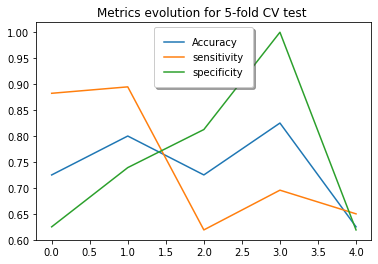

In [ ]:
plt.plot(acc_score, label="Accuracy")
plt.plot(sens_score, label="sensitivity")
plt.plot(spec_score, label="specificity")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.gca().set(title='Metrics evolution for 5-fold CV test ')